In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
import random
import networkx as nx 
import axelrod as axl
from axelrod.graph import Graph
from collections import namedtuple
import csv
import pandas as pd
import numpy as np
import tqdm

In [3]:
#Estrategias disponiveis
strategies = [s() for s in axl.strategies]
axl.seed(0)  

In [4]:
#Defining players
strategies = [axl.Cooperator(), axl.Defector(),axl.Adaptive(),axl.Handshake(),axl.TrickyCooperator(),axl.Hopeless(),axl.Desperate(),axl.Geller(),axl.TitForTat(),axl.LookerUp(),axl.Cooperator(), axl.Defector(),axl.Adaptive(),axl.Handshake(),axl.TrickyCooperator(),axl.Hopeless(),axl.Desperate(),axl.Geller(),axl.TitForTat(),axl.LookerUp(),axl.Cooperator(), axl.Defector(),axl.Adaptive(),axl.Handshake(),axl.TrickyCooperator(),axl.Hopeless(),axl.Desperate(),axl.Geller(),axl.TitForTat(),axl.LookerUp(),axl.Cooperator(), axl.Defector(),axl.Adaptive(),axl.Handshake(),axl.TrickyCooperator(),axl.Hopeless(),axl.Desperate(),axl.Geller(),axl.TitForTat(),axl.LookerUp(),axl.Cooperator(), axl.Defector(),axl.Adaptive(),axl.Handshake(),axl.TrickyCooperator(),axl.Hopeless(),axl.Desperate(),axl.Geller(),axl.TitForTat(),axl.LookerUp(),axl.Cooperator(), axl.Defector(),axl.Adaptive(),axl.Handshake(),axl.TrickyCooperator(),axl.Hopeless(),axl.Desperate(),axl.Geller(),axl.TitForTat(),axl.LookerUp(),axl.Cooperator(), axl.Defector(),axl.Adaptive(),axl.Handshake(),axl.TrickyCooperator(),axl.Hopeless(),axl.Desperate(),axl.Geller(),axl.TitForTat(),axl.LookerUp(),axl.Cooperator(), axl.Defector(),axl.Adaptive(),axl.Handshake(),axl.TrickyCooperator(),axl.Hopeless(),axl.Desperate(),axl.Geller(),axl.TitForTat(),axl.LookerUp(),axl.Cooperator(), axl.Defector(),axl.Adaptive(),axl.Handshake(),axl.TrickyCooperator(),axl.Hopeless(),axl.Desperate(),axl.Geller(),axl.TitForTat(),axl.LookerUp(),axl.Cooperator(), axl.Defector(),axl.Adaptive(),axl.Handshake(),axl.TrickyCooperator(),axl.Hopeless(),axl.Desperate(),axl.Geller(),axl.TitForTat(),axl.LookerUp()]

players = random.sample(strategies, 50)
plays = players      
         

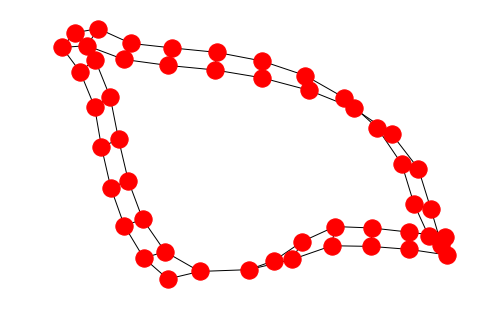

In [5]:
G = nx.Graph()
G.add_nodes_from(range(1,9))
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12),(12,13),(13,14),(14,15),(15,16),(16,17),(17,18),(18,19),(19,20),(20,21),(21,22),(22,23),(23,24),(24,25),
         (25,26),(26,27),(27,28),(28,29),(29,30),(30,31),(31,32),(32,33),(33,34),(34,35),(35,36),(36,37),(37,38),(38,39),(39,40),(40,41),(41,42),(42,43),(43,44),(44,45),(45,46),(46,47),(47,48),(48,49),
                  (0,25),(1,26),(2,27),(3,28),(4,29),(5,30),(6,31),(7,32),(8,33),(9,34),(10,35),(11,36),(12,37),(13,38),(14,39),(15,40),(16,41),(17,42),(18,43),(19,44),(20,45),(21,46),(22,47),(23,48),(24,49)])
nx.draw(G)
plt.savefig("Graph.png", format="PNG")

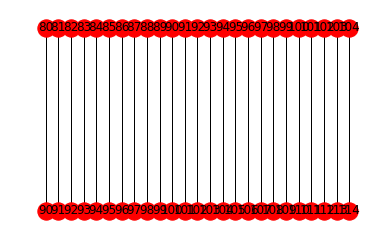

In [6]:
H=nx.grid_2d_graph(25,2)
pos = dict( (n, n) for n in H.nodes() )
labels = dict( ((i, j), i + (10-1-j) * 10 ) for i, j in H.nodes() )
nx.draw_networkx(H, pos=pos, labels= labels)

plt.axis('off')
plt.show()

In [7]:
#labels for color
n = G.number_of_nodes
labels={}
for i in range(len(players)): 
    labels[i] = '%s' % (players[i])
print (labels)
labels[1]

{0: 'LookerUp', 1: 'Geller', 2: 'Handshake', 3: 'Hopeless', 4: 'Handshake', 5: 'Hopeless', 6: 'Adaptive', 7: 'Defector', 8: 'Tit For Tat', 9: 'Defector', 10: 'Hopeless', 11: 'Tricky Cooperator', 12: 'Geller', 13: 'Tricky Cooperator', 14: 'Geller', 15: 'Desperate', 16: 'Hopeless', 17: 'Adaptive', 18: 'LookerUp', 19: 'Adaptive', 20: 'Tit For Tat', 21: 'Geller', 22: 'Tit For Tat', 23: 'LookerUp', 24: 'Adaptive', 25: 'LookerUp', 26: 'Adaptive', 27: 'Cooperator', 28: 'Defector', 29: 'Hopeless', 30: 'LookerUp', 31: 'Hopeless', 32: 'Cooperator', 33: 'Desperate', 34: 'Cooperator', 35: 'Desperate', 36: 'Hopeless', 37: 'Handshake', 38: 'Adaptive', 39: 'Tit For Tat', 40: 'Hopeless', 41: 'Adaptive', 42: 'Cooperator', 43: 'Desperate', 44: 'Desperate', 45: 'Tit For Tat', 46: 'Hopeless', 47: 'LookerUp', 48: 'Cooperator', 49: 'Handshake'}


'Geller'

In [8]:
#node colors
group_color = []
for pos in range(len(players)):
    if   labels[pos] == 'Cooperator':       
        color ='orange' 
        group_color.append(color)
    elif labels[pos] == 'Defector':          
        color ='green' 
        group_color.append(color)
    elif labels[pos] == 'Adaptive':       
        color ='grey' 
        group_color.append(color)
    elif labels[pos] == 'Handshake':  
        color ='purple' 
        group_color.append(color)
    elif labels[pos] == 'Tricky Cooperator':
        color ='pink' 
        group_color.append(color)
    elif labels[pos] == 'Hopeless': 
        color ='darkblue' 
        group_color.append(color)
    elif labels[pos] == 'Desperate':    
        color ='gold' 
        group_color.append(color)
    elif labels[pos] == 'Geller':
        color ='blue' 
        group_color.append(color)
    elif labels[pos] == 'Tit For Tat':
        color ='skyblue' 
        group_color.append(color)
    elif labels[pos] == 'LookerUp':    
        color ='indianred' 
        group_color.append(color)

group_color


['indianred',
 'blue',
 'purple',
 'darkblue',
 'purple',
 'darkblue',
 'grey',
 'green',
 'skyblue',
 'green',
 'darkblue',
 'pink',
 'blue',
 'pink',
 'blue',
 'gold',
 'darkblue',
 'grey',
 'indianred',
 'grey',
 'skyblue',
 'blue',
 'skyblue',
 'indianred',
 'grey',
 'indianred',
 'grey',
 'orange',
 'green',
 'darkblue',
 'indianred',
 'darkblue',
 'orange',
 'gold',
 'orange',
 'gold',
 'darkblue',
 'purple',
 'grey',
 'skyblue',
 'darkblue',
 'grey',
 'orange',
 'gold',
 'gold',
 'skyblue',
 'darkblue',
 'indianred',
 'orange',
 'purple']

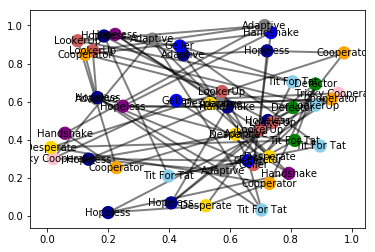

In [9]:
pos = nx.random_layout(G)

nx.draw_networkx_nodes(G, pos, node_color = group_color ,node_size = 150)

# for the edges
nx.draw_networkx_edges(G, pos, width=2, alpha = 0.5)
nx.draw
nx.draw_networkx_labels(G,pos,labels=labels,font_size=10)
plt.show()

In [10]:
print(G.edges)
G.edge_attr_dict_factory()

[(1, 0), (1, 2), (1, 26), (2, 3), (2, 27), (3, 4), (3, 28), (4, 5), (4, 29), (5, 6), (5, 30), (6, 7), (6, 31), (7, 8), (7, 32), (8, 9), (8, 33), (0, 25), (9, 10), (9, 34), (10, 11), (10, 35), (11, 12), (11, 36), (12, 13), (12, 37), (13, 14), (13, 38), (14, 15), (14, 39), (15, 16), (15, 40), (16, 17), (16, 41), (17, 18), (17, 42), (18, 19), (18, 43), (19, 20), (19, 44), (20, 21), (20, 45), (21, 22), (21, 46), (22, 23), (22, 47), (23, 24), (23, 48), (24, 25), (24, 49), (25, 26), (26, 27), (27, 28), (28, 29), (29, 30), (30, 31), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49)]


{}

In [11]:
matches = len(G.edges)
edges = G.edges
scores = []

tournament = axl.Tournament(players, edges=edges)
results = tournament.play(processes=1)
scores.append(zip(*results.scores))

Analysing:  44%|████▍     | 11/25 [00:01<00:05,  2.79it/s]/home/joao123/anaconda3/lib/python3.7/site-packages/axelrod/result_set.py:413: RuntimeWarning: invalid value encountered in true_divide
  / sum(map(np.array, self.match_lengths))
Analysing: 100%|██████████| 25/25 [00:01<00:00,  4.21it/s]


In [12]:
#Top ten
results.ranked_names[:10]


['Defector',
 'Adaptive',
 'Handshake',
 'Adaptive',
 'Desperate',
 'Desperate',
 'Handshake',
 'Defector',
 'Adaptive',
 'Adaptive']

In [1]:
plot = axl.Plot(results)


NameError: name 'axl' is not defined

/home/joao123/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


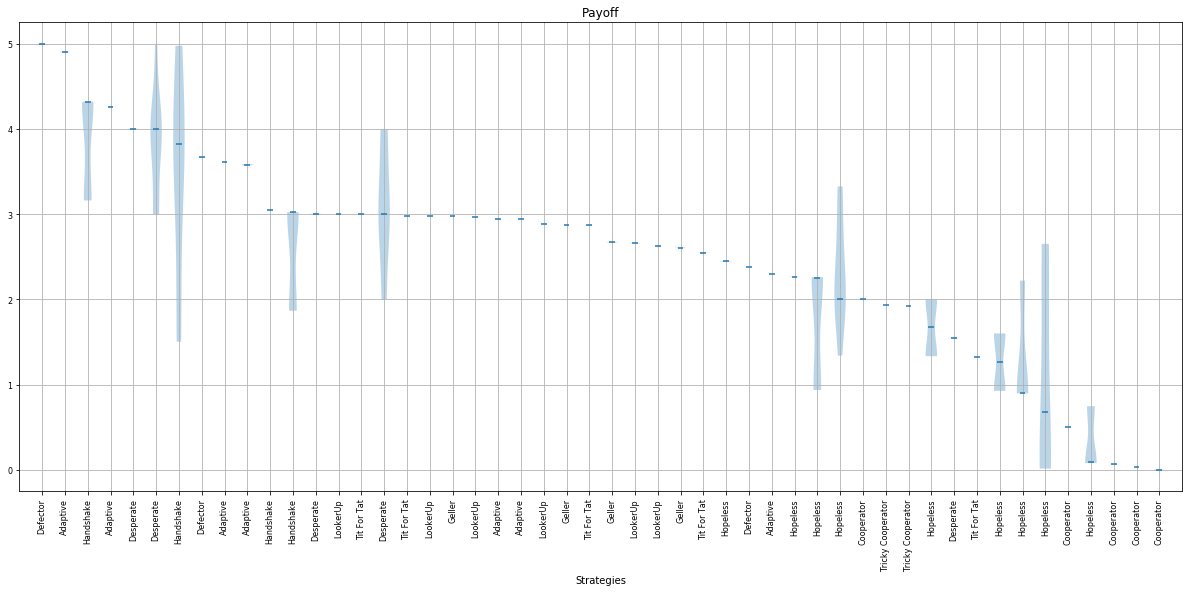

In [14]:
#viewing the outputs of tournaments with a large number of strategies:
_, ax = plt.subplots()
title = ax.set_title("Payoff")
xlabel = ax.set_xlabel('Strategies')
grid = ax.grid()
p = plot.boxplot(ax=ax)
p.show()

In [15]:
print(results.payoff_matrix)

[[0, 3.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3.0, 0, 2.9900000000000007, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.95, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 2.9900000000000007, 0, 3.5869999999999997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4.99, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1.6069999999999998, 0, 1.6069999999999998, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.0015, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 3.5869999999999997, 0, 2.893, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.934, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 2.398, 0, 0.123, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.67400000000

/home/joao123/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


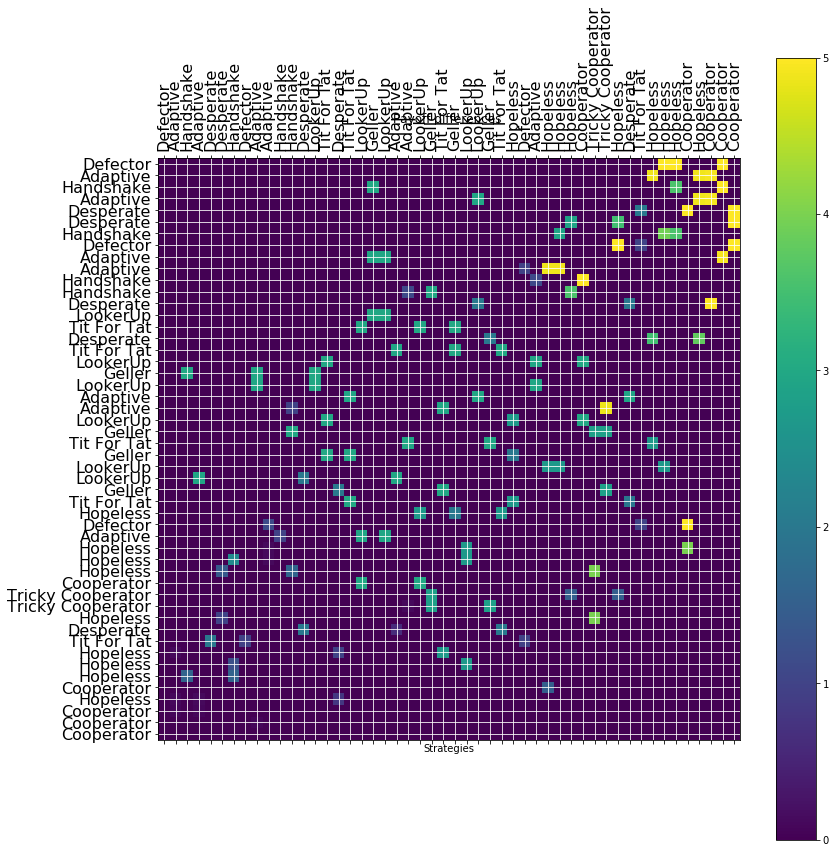

In [16]:
_, ax = plt.subplots()
title = ax.set_title("Payoff differences ")
xlabel = ax.set_xlabel('Strategies')
grid = ax.grid(color='white')
p = plot.payoff(ax =ax)
p.show()

/home/joao123/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


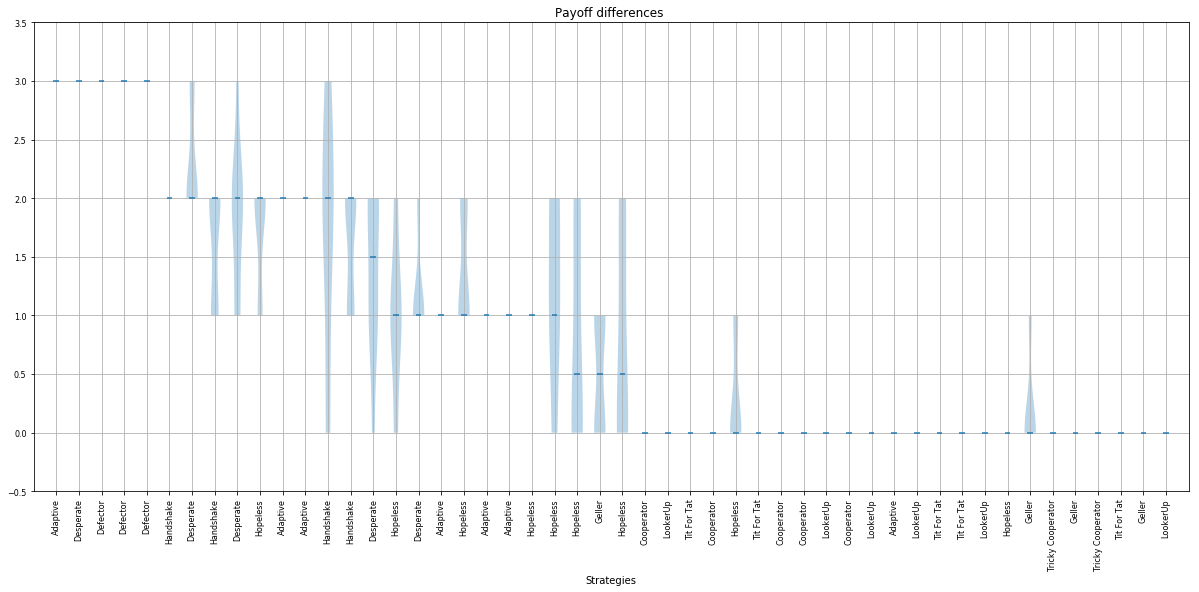

In [17]:
#Distributions of wins
_, ax = plt.subplots()
title = ax.set_title("Payoff differences ")
xlabel = ax.set_xlabel('Strategies')
grid = ax.grid()
p = plot.winplot(ax=ax)
p.show()

/home/joao123/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


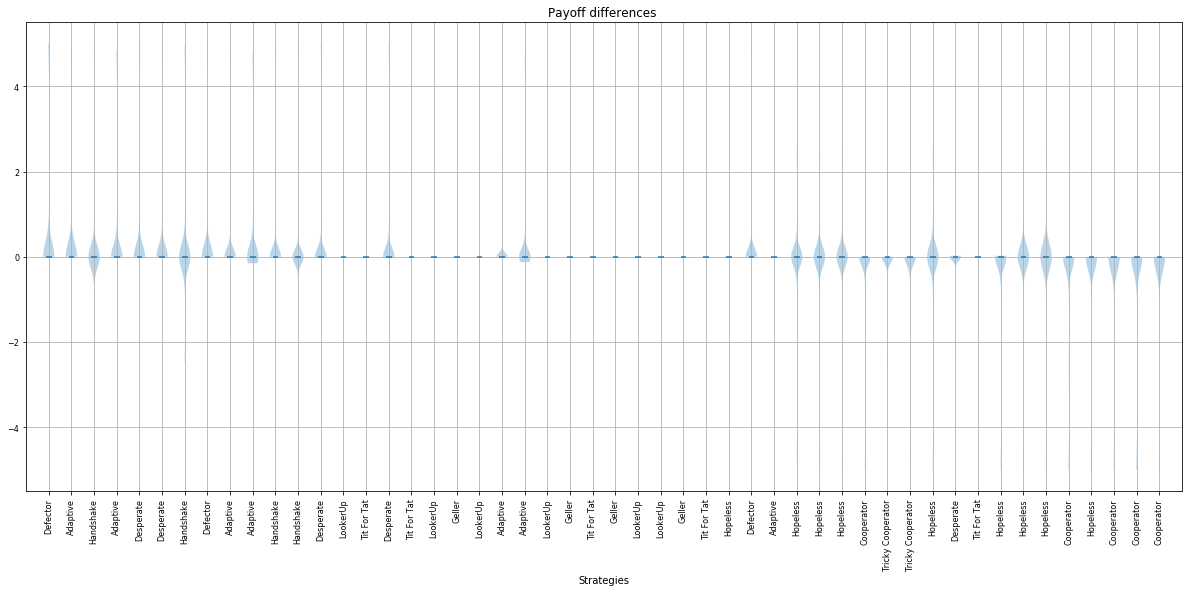

In [18]:
_, ax = plt.subplots()
title = ax.set_title("Payoff differences ")
xlabel = ax.set_xlabel('Strategies')
grid = ax.grid()
p = plot.sdvplot(ax =ax)
p.show()

/home/joao123/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


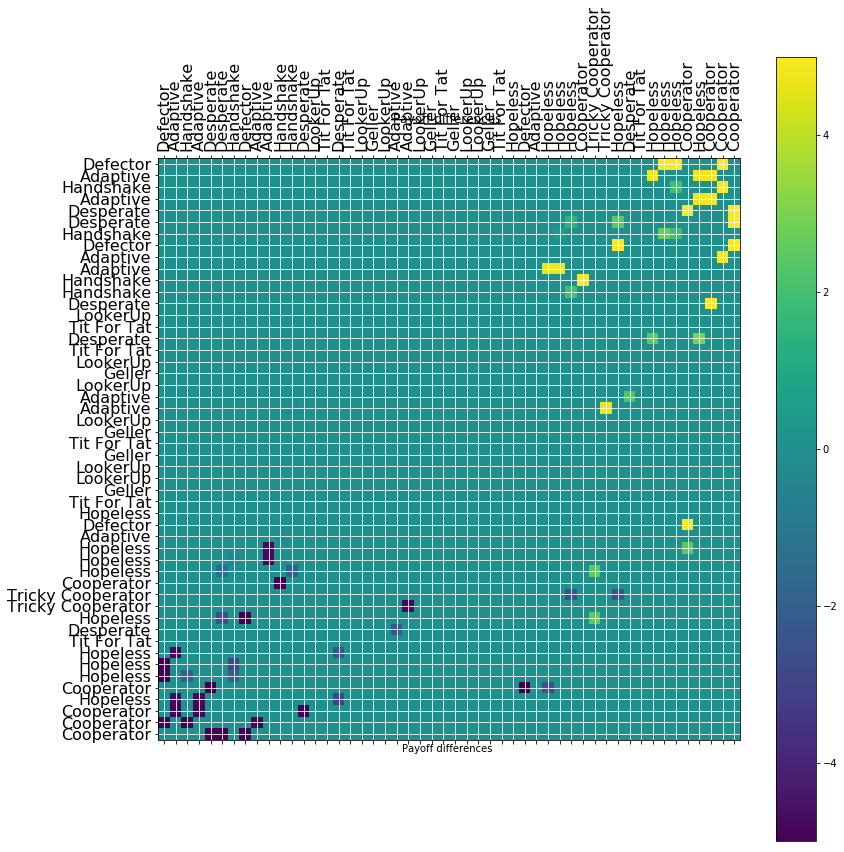

In [19]:
_, ax = plt.subplots()
title = ax.set_title("Payoff differences ")
xlabel = ax.set_xlabel('Strategies')
grid = ax.grid(color='white')
p = plot.pdplot(ax =ax,title="Payoff differences ")
p.show()

In [20]:
#Moran Process 
edges = G.edges()
grp = Graph(edges)
mp = axl.MoranProcess(players = players,interaction_graph = grp, turns = 200)
mp.play()
print("The winner is:", mp.winning_strategy_name)

KeyboardInterrupt: 

In [ ]:
# Plot the results MP
player_names = mp.populations[0].keys()

plot_data = []
labels = []
for name in player_names:
    labels.append(name)
    values = [counter[name] for counter in mp.populations]
    plot_data.append(values)
    domain = range(len(values))

plt.stackplot(domain, plot_data, labels=labels)
plt.legend()
plt.xlabel("Rounds")
plt.ylabel("Number of Individuals")
plt.show()

mp.populations_plot()